<a href="https://colab.research.google.com/github/PosiTriOnix/BigTechStocks/blob/main/Stocks_clean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup and Reload

In [ ]:
# === SETUP & RELOAD ===

# 🟦 1. Imports
import os, numpy as np, pandas as pd
from google.colab import drive

# 🟦 2. Montar Google Drive
drive.mount('/content/drive', force_remount=True)

# 🟦 3. Definir rutas
DATA_DIR = "/content/drive/MyDrive/Skill up data Laboratoria/Proyecto 3/DataSets"
XLSX_PATH = os.path.join(DATA_DIR, "big_tech_stock_prices.xlsx")
COMP_PATH = os.path.join(DATA_DIR, "big_tech_companies.csv")
PARQUET_PATH = os.path.join(DATA_DIR, "big_tech_stock_prices_clean.parquet")

# 🟦 4. Cargar datos (preferir parquet si ya existe)
if os.path.exists(PARQUET_PATH):
    df = pd.read_parquet(PARQUET_PATH)
else:
    df = pd.read_excel(XLSX_PATH)

    # -------------------
    # 🔵 LIMPIEZA BASE
    # -------------------
    df = df.drop_duplicates()
    df = df.dropna(subset=["date","open","high","low","close","adj_close","volume"])
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
    df = df.dropna(subset=["date"])  # eliminar fechas inválidas

    # -------------------
    # 🔵 FEATURE ENGINEERING INICIAL
    # -------------------
    df = df.sort_values(["stock_symbol","date"])
    df["daily_return"] = df.groupby("stock_symbol")["adj_close"].pct_change()

    # 🟢 Añadir nombres de empresas
    co = pd.read_csv(COMP_PATH)
    df = df.merge(co, on="stock_symbol", how="left")


    # Guardar parquet para próximas sesiones
    df.to_parquet(PARQUET_PATH, index=False)

# 🟦 5. Reglas de verificación (asegurar consistencia)
if "daily_return" not in df.columns or df["daily_return"].isna().all():
    df = df.sort_values(["stock_symbol","date"])
    df["daily_return"] = df.groupby("stock_symbol")["adj_close"].pct_change()

# 🟦 6. (Opcional) Feature engineering adicional
# Retorno mensual
df["month"] = df["date"].dt.to_period("M")
monthly_return = df.groupby(["stock_symbol","month"])["adj_close"].last().pct_change()

# 🟦 7. Chequeos finales
print("Shape final:", df.shape)
print("Fechas:", df["date"].min(), "→", df["date"].max())
print("Empresas:", df["stock_symbol"].nunique())


Mounted at /content/drive
Shape final: (45088, 10)
Fechas: 2010-01-04 00:00:00 → 2023-01-24 00:00:00
Empresas: 14


## **Procesar y preparar la base de datos**

In [ ]:
# Conectamos nuestro drive al nb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Skill up data Laboratoria/Proyecto 3/DataSets/big_tech_stock_prices.xlsx')

# revisamos las primeras filas
df.head()

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0


In [ ]:
# importamos archivo de simbolos con nombre de empresas

co = pd.read_csv('/content/drive/MyDrive/Skill up data Laboratoria/Proyecto 3/DataSets/big_tech_companies.csv')

# revisamos las primeras filas
co.head()

,stock_symbol,company
0,AAPL,Apple Inc.
1,ADBE,Adobe Inc.
2,AMZN,"Amazon.com, Inc."
3,CRM,"Salesforce, Inc."
4,CSCO,"Cisco Systems, Inc."


In [ ]:
# Agregamos una nueva columna  en el df
# Cargar tabla de empresas
co = pd.read_csv(os.path.join(DATA_DIR, "big_tech_companies.csv"))

# Unir con df principal
df = df.merge(co, on="stock_symbol", how="left")
df.head()


,stock_symbol,date,open,high,low,close,adj_close,volume,daily_return,month,company
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0,NaN,2010-01,Apple Inc.
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0,0.001729,2010-01,Apple Inc.
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0,-0.015906,2010-01,Apple Inc.
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0,-0.001849,2010-01,Apple Inc.
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0,0.006648,2010-01,Apple Inc.


In [ ]:
# observamos los estadisticos robustos de la data
df.describe()

,date,open,high,low,close,adj_close,volume
count,45089,45089.000000,45089.000000,45089.000000,45089.000000,45089.000000,4.508900e+04
mean,2016-08-03 16:49:50.565326336,89.267274,90.370562,88.112582,89.272028,85.210443,5.298188e+07
min,2010-01-04 00:00:00,1.076000,1.108667,0.998667,1.053333,1.053333,5.892000e+05
25%,2013-05-30 00:00:00,25.670000,25.930180,25.360001,25.660000,22.077059,9.629500e+06
50%,2016-08-09 00:00:00,47.930000,48.459999,47.470001,47.970001,45.378979,2.646420e+07
75%,2019-10-22 00:00:00,128.660004,129.847031,127.250000,128.639999,113.679848,5.840030e+07
max,2023-01-24 00:00:00,696.280029,700.989990,686.090027,691.690002,691.690002,1.880998e+09
std,NaN,101.625934,103.000049,100.123385,101.591905,100.994995,9.324966e+07


In [ ]:
df.info()
# notamos una fila vacia que solo contiene stock symbol

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45090 entries, 0 to 45089
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   stock_symbol  45090 non-null  object        
 1   date          45089 non-null  datetime64[ns]
 2   open          45089 non-null  float64       
 3   high          45089 non-null  float64       
 4   low           45089 non-null  float64       
 5   close         45089 non-null  float64       
 6   adj_close     45089 non-null  float64       
 7   volume        45089 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 2.8+ MB


In [ ]:
# revisamos valores nulos y duplicados
df.isna().sum()
df.duplicated().sum()

np.int64(1)

In [ ]:
#  1. Revisar duplicados
print("Duplicados antes:", df.duplicated().sum())

# Eliminar duplicados
df = df.drop_duplicates()
print("Duplicados después:", df.duplicated().sum())

#  2. Revisar nulos
print("\nValores nulos por columna antes:")
print(df.isna().sum())

# Eliminar filas con valores nulos
df = df.dropna()

print("\nValores nulos por columna después:")
print(df.isna().sum())

#  3. Ver forma final del dataset
print("\nDimensiones finales (filas, columnas):", df.shape)

#  4. Revisar rango temporal
print("\nPeriodo de datos:", df['date'].min(), "→", df['date'].max())

#  5. Revisar cuántas empresas hay
print("\nNúmero de empresas:", df['stock_symbol'].nunique())
print("Empresas:", df['stock_symbol'].unique())


Duplicados antes: 0
Duplicados después: 0

Valores nulos por columna antes:
stock_symbol     0
date             0
open             0
high             0
low              0
close            0
adj_close        0
volume           0
daily_return    14
month            0
company          0
dtype: int64

Valores nulos por columna después:
stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
daily_return    0
month           0
company         0
dtype: int64

Dimensiones finales (filas, columnas): (45074, 11)

Periodo de datos: 2010-01-05 00:00:00 → 2023-01-24 00:00:00

Número de empresas: 14
Empresas: ['AAPL' 'ADBE' 'AMZN' 'CRM' 'CSCO' 'GOOGL' 'IBM' 'INTC' 'META' 'MSFT'
 'NFLX' 'NVDA' 'ORCL' 'TSLA']



---

# **EDA - Exploratory Data Analysis**

In [ ]:
# Esto nos muestra el rango de tiempo registrado en los datos.
df['date'].min(), df['date'].max()

(Timestamp('2010-01-04 00:00:00'), Timestamp('2023-01-24 00:00:00'))

In [ ]:
# Obtenemos el numero de empresas que se analizan
df['stock_symbol'].nunique(), df['stock_symbol'].unique()

(14,
 array(['AAPL', 'ADBE', 'AMZN', 'CRM', 'CSCO', 'GOOGL', 'IBM', 'INTC',
        'META', 'MSFT', 'NFLX', 'NVDA', 'ORCL', 'TSLA'], dtype=object))

## Visualizar tendencias en el tiempo

###Graficos simples

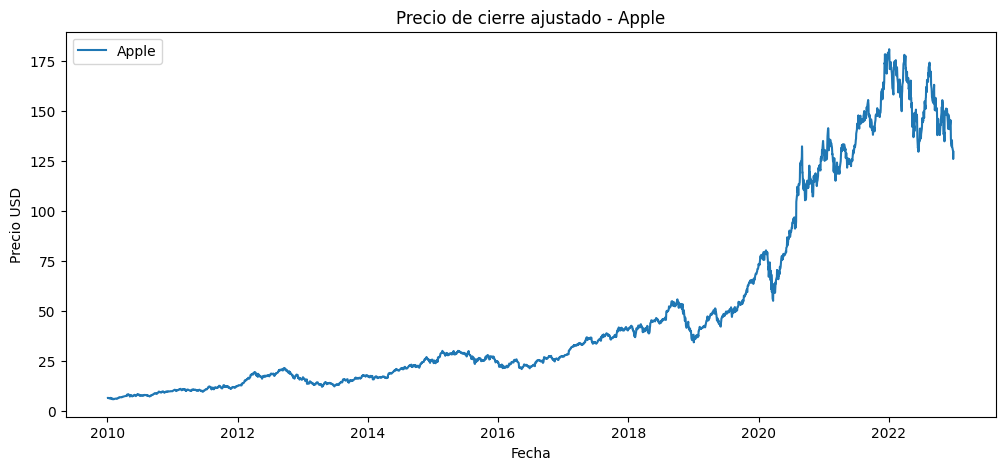

In [ ]:
import matplotlib.pyplot as plt

apple = df[df['stock_symbol'] == 'AAPL']
plt.figure(figsize=(12,5))
plt.plot(apple['date'], apple['adj_close'], label='Apple')
plt.title('Precio de cierre ajustado - Apple')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.legend()
plt.show()

# Esta es una serie temporal de subidas y bajadas de las acciones de Apple en el tiempo

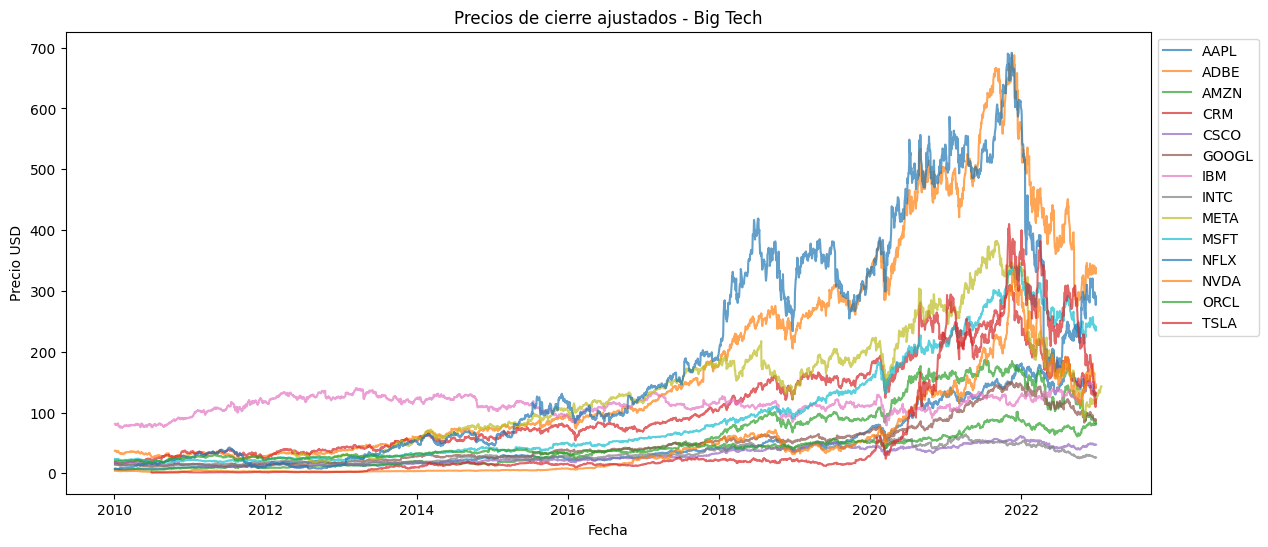

In [ ]:
plt.figure(figsize=(14,6))

# Filtramos el dataset para quedarnos con la columna de interés
for empresa in df['stock_symbol'].unique():
    subset = df[df['stock_symbol'] == empresa]
    plt.plot(subset['date'], subset['adj_close'], label=empresa, alpha=0.7)

plt.title('Precios de cierre ajustados - Big Tech')
plt.xlabel('Fecha')
plt.ylabel('Precio USD')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))  # Leyenda fuera del gráfico
plt.show()

# Esta grafica muestra la evolucion de precios de todas las empresas

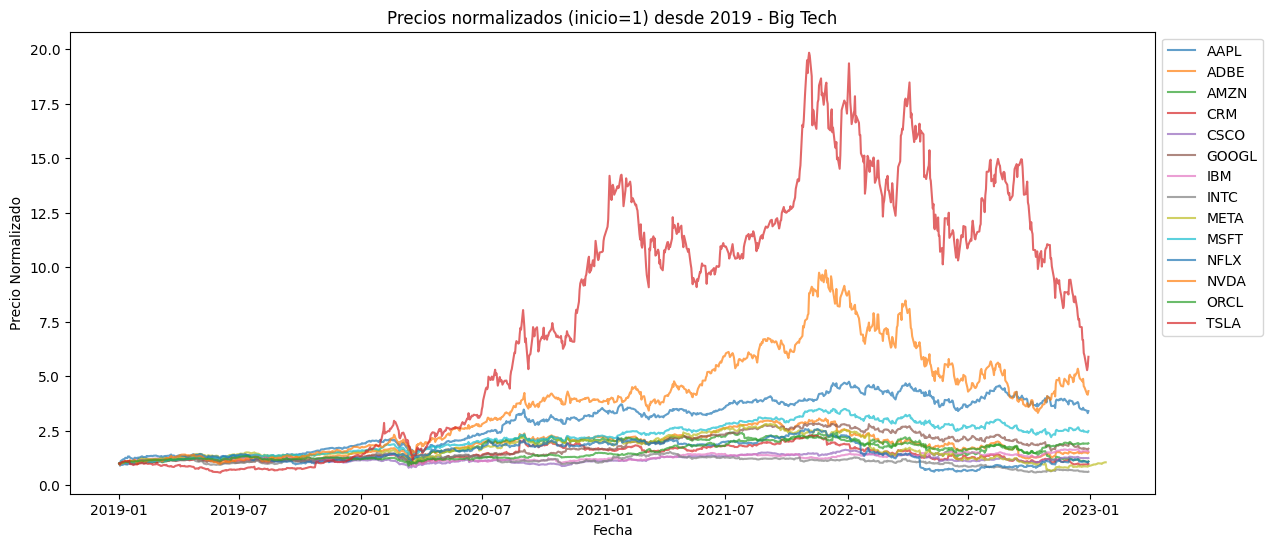

In [ ]:
df_filtrado = df[df['date'] >= "2019-01-01"].copy()

# Normalizar precios por empresa a partir de 2019
df_filtrado['normalized_price'] = df_filtrado.groupby('stock_symbol')['adj_close'].transform(lambda x: x / x.iloc[0])

plt.figure(figsize=(14,6))
for empresa in df_filtrado['stock_symbol'].unique():
    subset = df_filtrado[df_filtrado['stock_symbol'] == empresa]
    plt.plot(subset['date'], subset['normalized_price'], label=empresa, alpha=0.7)

plt.title('Precios normalizados (inicio=1) desde 2019 - Big Tech')
plt.xlabel('Fecha')
plt.ylabel('Precio Normalizado')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

# Esta grafica muestra solo los precios de las empresas despues de 2019

###Grafico interactivo

In [ ]:
!pip install plotly

In [ ]:
# Si no lo tienes:
# !pip install plotly

import plotly.express as px

# Filtrar periodo
df19 = df[df['date'] >= "2019-01-01"].copy()

fig = px.line(
    df19,
    x="date",
    y="adj_close",
    color="stock_symbol",
    title="Big Tech – Precio de cierre ajustado (desde 2019)",
    labels={"date": "Fecha", "adj_close": "Precio (USD)", "stock_symbol": "Empresa"},
)

# Controles de rango (rangeselector + rangeslider)
fig.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=6, label="6M", step="month", stepmode="backward"),
            dict(count=1, label="1A", step="year", stepmode="backward"),
            dict(count=3, label="3A", step="year", stepmode="backward"),
            dict(step="all", label="Todo")
        ])
    ),
    rangeslider=dict(visible=True),
    type="date"
)

# Hover más claro
fig.update_traces(hovertemplate="%{x|%Y-%m-%d}<br>%{fullData.name}: %{y:.2f} USD")

# Layout ancho (opcional)
fig.update_layout(legend_title_text="Ticker", hovermode="x unified", height=600)

fig.show()

# Esta grafica es dinamica, para elegir el tiempo y las empresas que aparecen

## Rolling mean

In [ ]:
# Ejemplo: Apple
apple = df[df['stock_symbol'] == 'AAPL'].sort_values('date')

# Media móvil de 30 días sobre el precio ajustado
apple['rolling_mean_30'] = apple['adj_close'].rolling(window=30).mean()

# Media móvil de 90 días
apple['rolling_mean_90'] = apple['adj_close'].rolling(window=90).mean()


###Graficos simples

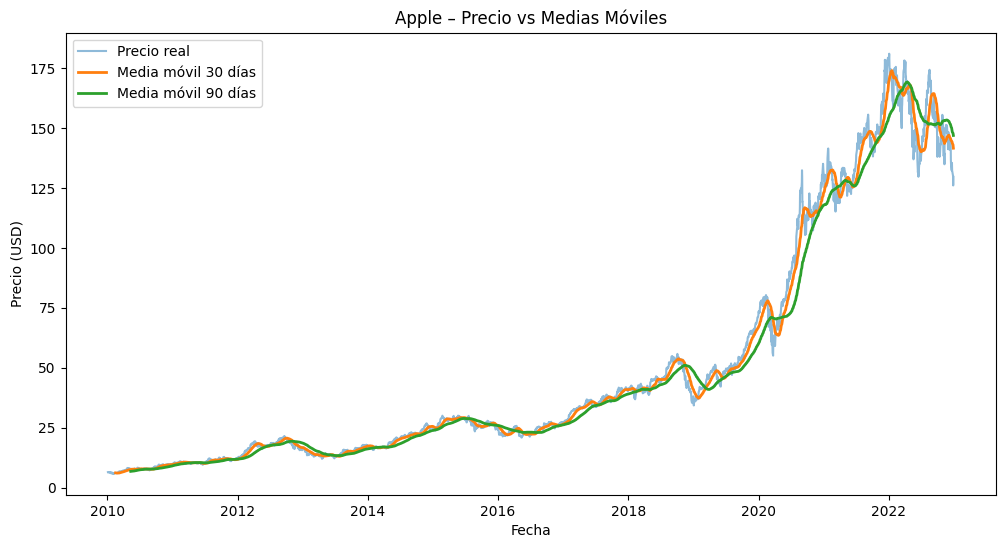

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(apple['date'], apple['adj_close'], label='Precio real', alpha=0.5)
plt.plot(apple['date'], apple['rolling_mean_30'], label='Media móvil 30 días', linewidth=2)
plt.plot(apple['date'], apple['rolling_mean_90'], label='Media móvil 90 días', linewidth=2)

plt.title('Apple – Precio vs Medias Móviles')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.show()

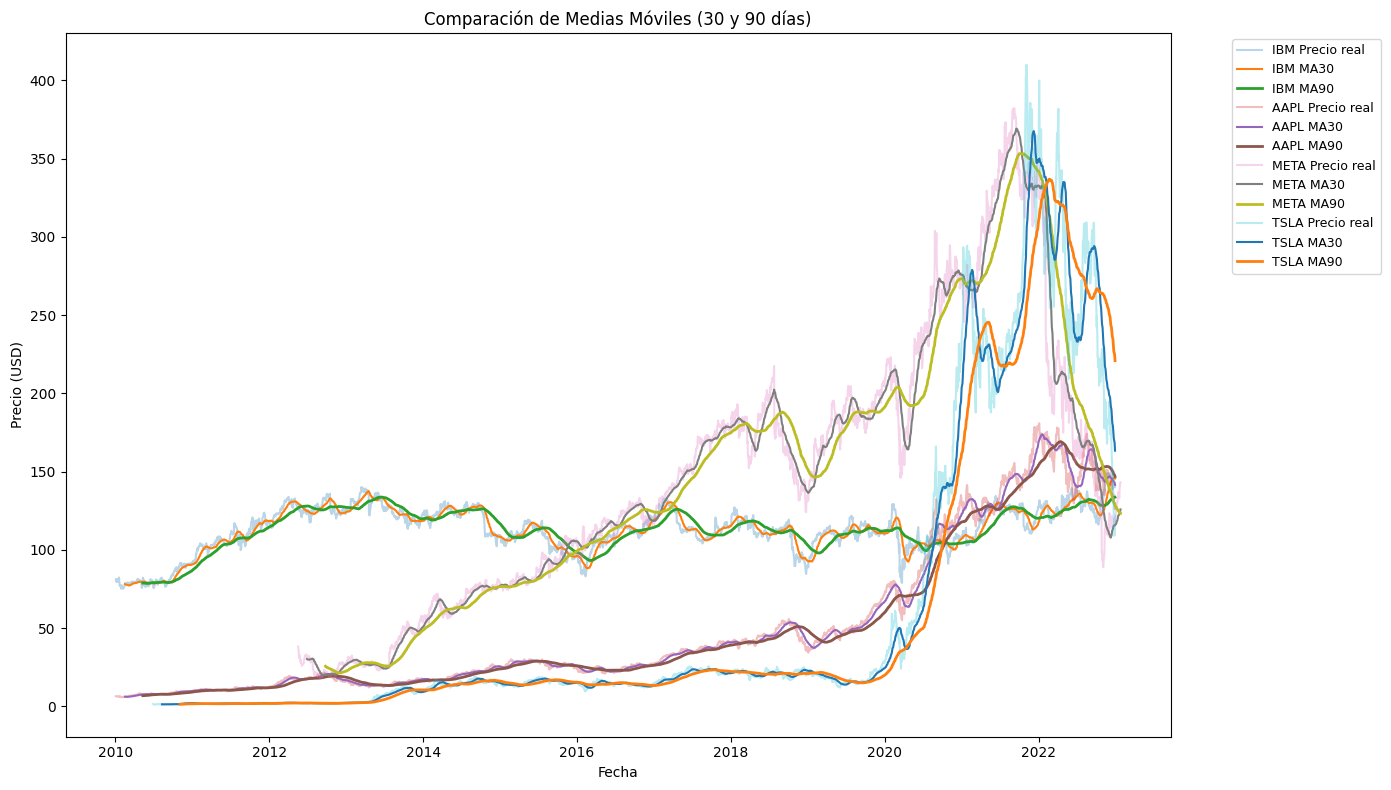

In [ ]:
import matplotlib.pyplot as plt

# Filtrar solo las 4 empresas de interés
empresas = ['IBM', 'AAPL', 'META', 'TSLA']
df_sel = df[df['stock_symbol'].isin(empresas)].sort_values(['stock_symbol','date'])

# Calcular rolling mean (30 y 90 días) por empresa
df_sel['rolling_mean_30'] = df_sel.groupby('stock_symbol')['adj_close'].transform(lambda x: x.rolling(30).mean())
df_sel['rolling_mean_90'] = df_sel.groupby('stock_symbol')['adj_close'].transform(lambda x: x.rolling(90).mean())

# Graficar
plt.figure(figsize=(14,8))

for empresa in empresas:
    subset = df_sel[df_sel['stock_symbol'] == empresa]
    plt.plot(subset['date'], subset['adj_close'], label=f'{empresa} Precio real', alpha=0.3)
    plt.plot(subset['date'], subset['rolling_mean_30'], label=f'{empresa} MA30', linewidth=1.5)
    plt.plot(subset['date'], subset['rolling_mean_90'], label=f'{empresa} MA90', linewidth=2)

plt.title('Comparación de Medias Móviles (30 y 90 días)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1), fontsize=9)
plt.tight_layout()
plt.show()


###Grafico interactivo

In [ ]:
import plotly.graph_objects as go

# Selección de empresas
empresas = ['IBM', 'AAPL', 'META', 'TSLA']
df_sel = df[df['stock_symbol'].isin(empresas)].sort_values(['stock_symbol','date'])

# Calcular medias móviles
df_sel['rolling_mean_30'] = df_sel.groupby('stock_symbol')['adj_close'].transform(lambda x: x.rolling(30).mean())
df_sel['rolling_mean_90'] = df_sel.groupby('stock_symbol')['adj_close'].transform(lambda x: x.rolling(90).mean())

# Crear figura
fig = go.Figure()

# Agregar trazas para cada empresa
for empresa in empresas:
    subset = df_sel[df_sel['stock_symbol'] == empresa]

    # Precio real (transparente)
    fig.add_trace(go.Scatter(
        x=subset['date'], y=subset['adj_close'],
        mode='lines', name=f'{empresa} Precio real',
        line=dict(width=1, dash='dot'),
        opacity=0.3,
        visible=True
    ))

    # Media móvil 30 días
    fig.add_trace(go.Scatter(
        x=subset['date'], y=subset['rolling_mean_30'],
        mode='lines', name=f'{empresa} MA30',
        line=dict(width=2),
        visible=True
    ))

    # Media móvil 90 días
    fig.add_trace(go.Scatter(
        x=subset['date'], y=subset['rolling_mean_90'],
        mode='lines', name=f'{empresa} MA90',
        line=dict(width=2, dash='dash'),
        visible=False  # por defecto oculto
    ))

# Botones para cambiar entre MA30 y MA90
buttons = [
    dict(
        label="Mostrar MA30",
        method="update",
        args=[{"visible": [i%3 != 2 for i in range(len(fig.data))]}]  # oculta MA90
    ),
    dict(
        label="Mostrar MA90",
        method="update",
        args=[{"visible": [i%3 != 1 for i in range(len(fig.data))]}]  # oculta MA30
    ),
    dict(
        label="Mostrar Ambas",
        method="update",
        args=[{"visible": [True]*len(fig.data)}]  # todas visibles
    )
]

# Layout
fig.update_layout(
    title="Comparación de Medias Móviles (30 y 90 días) – IBM, AAPL, META, TSLA",
    xaxis_title="Fecha",
    yaxis_title="Precio (USD)",
    height=650,
    updatemenus=[dict(type="buttons", direction="right", x=0.5, y=1.1, buttons=buttons)],
    hovermode="x unified"
)

fig.show()

### Volatilidad y distribuciones

In [ ]:
df['daily_return'] = df.groupby('stock_symbol')['adj_close'].pct_change()
df.head()

# Creamos una columna de retorno diario

,stock_symbol,date,open,high,low,close,adj_close,volume,normalized_price,daily_return
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600.0,1.000000,NaN
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800.0,1.001729,0.001729
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000.0,0.985795,-0.015906
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200.0,0.983972,-0.001849
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800.0,0.990514,0.006648


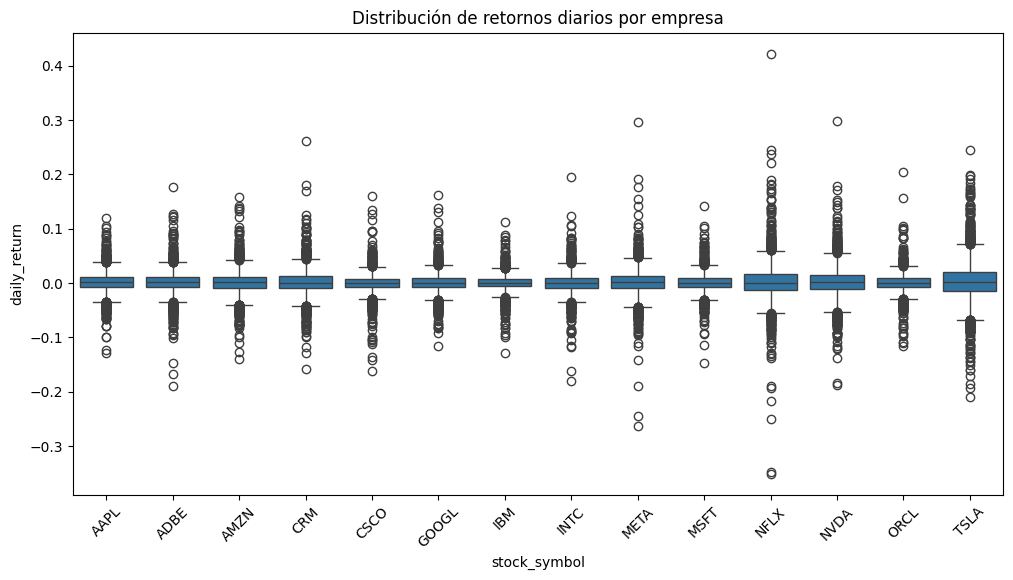

In [ ]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='stock_symbol', y='daily_return')
plt.title('Distribución de retornos diarios por empresa')
plt.xticks(rotation=45)
plt.show()

La mayoría de las cajas están muy centradas en 0 → significa que los rendimientos diarios suelen ser pequeños (como esperarías en acciones, la mayoría de los días no hay grandes saltos).

Anchura de la caja (altura en eje Y): indica volatilidad.

Una caja más alta → la acción tiene retornos más dispersos (más riesgosa).

Una caja más baja → retornos más consistentes (más estable).

Outliers hacia arriba y abajo → reflejan días de caídas fuertes (ej. pandemia, crisis) o subidas inusuales.

Si comparas entre empresas:

TSLA y NVDA parecen tener cajas más grandes y más outliers → son más volátiles (típico de Tesla y Nvidia 💡).

AAPL, MSFT, GOOGL muestran cajas más compactas → más estables.

Un inversor conservador preferiría empresas con medianas cercanas a 0 y poca dispersión (ej. AAPL, MSFT).

Un inversor agresivo buscaría empresas con mayor dispersión y outliers porque ahí están las oportunidades de ganancia rápida (ej. TSLA, NVDA).

El boxplot ayuda a segmentar empresas por riesgo y estabilidad.

### Correlacion entre empresas

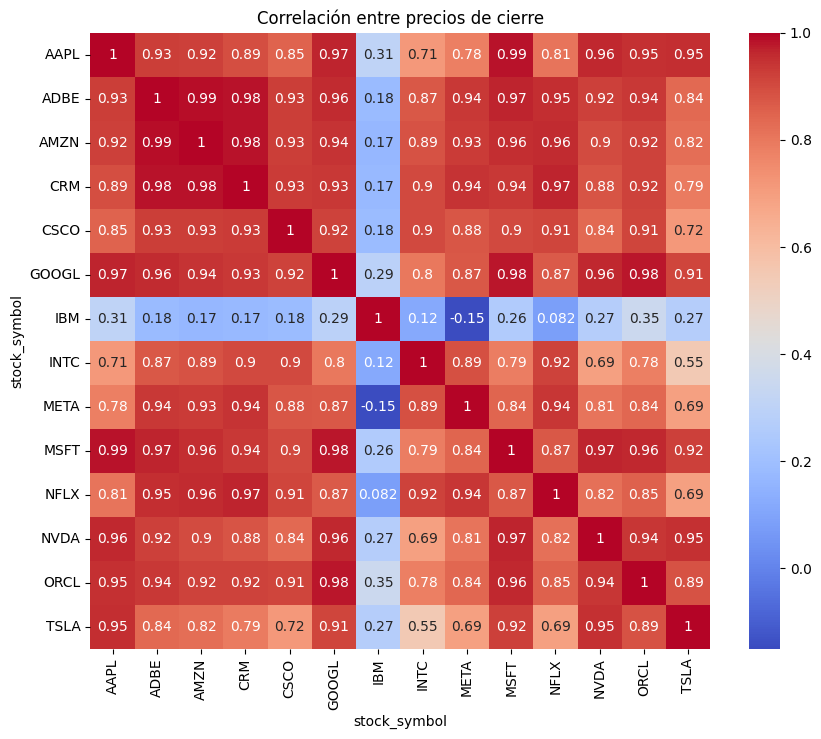

In [ ]:
pivot = df.pivot(index='date', columns='stock_symbol', values='adj_close')
corr = pivot.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlación entre precios de cierre')
plt.show()


Alta correlación general

La mayoría de las empresas Big Tech se mueven juntas (valores entre 0.85 y 0.99).

Ejemplo: AAPL–MSFT (0.99) → Apple y Microsoft tienen casi el mismo patrón de precios.

Ejemplo: GOOGL–META (0.98) → Google y Meta también casi idénticos.

Empresas con baja correlación

IBM destaca con correlaciones muy bajas (0.12–0.35) con casi todas las demás → se comporta diferente al resto de Big Tech.

META–IBM (-0.15) → incluso una correlación negativa ligera, es decir, tienden a moverse en sentidos opuestos en algunos periodos.

Tesla (TSLA)

Correlaciones más bajas con varios (ej. TSLA–CRM 0.72, TSLA–META 0.69) → Tesla se comporta más independiente, probablemente por ser del sector automotriz, aunque también es considerada "tech".

Grupos de empresas muy ligadas

FAANG tradicionales (AAPL, AMZN, GOOGL, NFLX, META) → correlaciones muy altas entre sí (0.9+).

NVIDIA (NVDA), Adobe (ADBE), Oracle (ORCL) → también bastante ligadas al grupo central.

Si un inversor quiere diversificación real, no conviene elegir solo empresas con correlación muy alta (ej. AAPL y MSFT, porque se mueven casi igual).

Para balancear riesgo, conviene mezclar con empresas que tengan baja correlación (ej. IBM o Tesla) → porque amortiguan las caídas del resto.

Si lo que busca es maximizar exposición al sector tech en bloque, entonces invertir en cualquiera de las más correlacionadas (AAPL, MSFT, GOOGL, AMZN, META) da un efecto muy parecido.

##Riesgo vs Retorno

### Estadisticas resumidas

In [ ]:
resumen = df.groupby('stock_symbol',)['daily_return'].agg(['mean','std']).reset_index()
resumen.rename(columns={'mean':'retorno_prom','std':'volatilidad'}, inplace=True)
print(resumen)

   stock_symbol  retorno_prom  volatilidad
0          AAPL      0.001079     0.018092
1          ADBE      0.000876     0.019975
2          AMZN      0.000990     0.020811
3           CRM      0.000864     0.023133
4          CSCO      0.000448     0.016845
5         GOOGL      0.000674     0.017032
6           IBM      0.000270     0.014187
7          INTC      0.000365     0.018606
8          META      0.000812     0.025248
9          MSFT      0.000844     0.016377
10         NFLX      0.001654     0.032778
11         NVDA      0.001475     0.028087
12         ORCL      0.000552     0.016442
13         TSLA      0.002024     0.036001


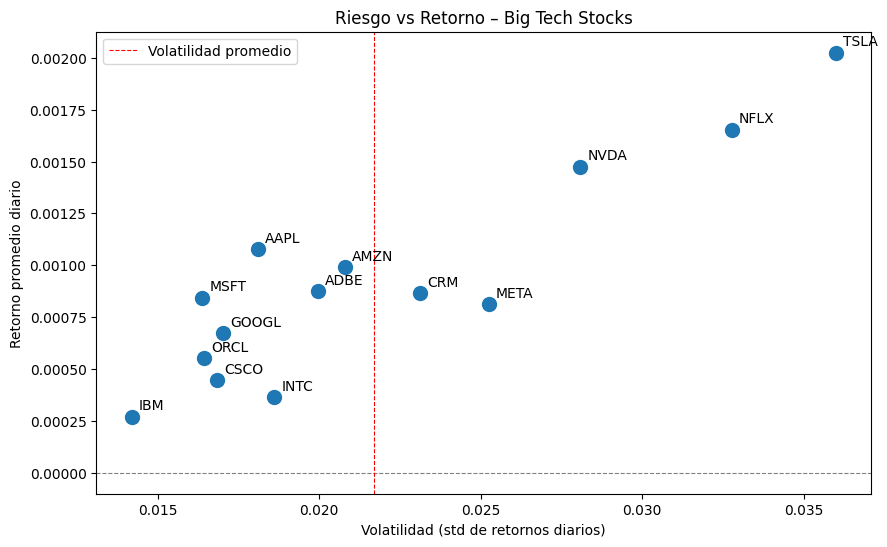

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Gráfico de dispersión
plt.scatter(resumen['volatilidad'], resumen['retorno_prom'], s=100)

# Etiquetas de cada empresa
for i, txt in enumerate(resumen['stock_symbol']):
    plt.annotate(txt,
                 (resumen['volatilidad'][i], resumen['retorno_prom'][i]),
                 textcoords="offset points", xytext=(5,5), ha='left')

plt.title('Riesgo vs Retorno – Big Tech Stocks')
plt.xlabel('Volatilidad (std de retornos diarios)')
plt.ylabel('Retorno promedio diario')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # línea base en retorno 0
plt.axvline(resumen['volatilidad'].mean(), color='red', linestyle='--', linewidth=0.8, label='Volatilidad promedio')

plt.legend()
plt.show()


###Gráfico dinámico

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Asegúrate de que 'resumen' tenga Company
resumen = resumen.merge(
    df[['stock_symbol','company']].drop_duplicates(),
    on='stock_symbol', how='left'
)

# Promedios para las líneas de referencia
x_mean = resumen["volatilidad"].mean()
y_mean = resumen["retorno_prom"].mean()

# Scatter interactivo
fig = px.scatter(
    resumen,
    x="volatilidad",
    y="retorno_prom",
    text="stock_symbol",         # etiqueta del punto
    hover_name="company",   # título del hover
    title="Riesgo vs Retorno – Big Tech Stocks",
    labels={
        "volatilidad": "Volatilidad (std retornos diarios)",
        "retorno_prom": "Retorno promedio diario"
    }
)

# Formato de etiquetas sobre los puntos
fig.update_traces(textposition="top center")

# Hovertemplate más claro (porcentajes)
fig.update_traces(
    hovertemplate=(
        "<b>%{hovertext}</b><br>"  # hover_name
        "Volatilidad: %{x:.2%}<br>"
        "Retorno prom.: %{y:.2%}<extra></extra>"
    )
)

# Líneas de referencia (promedios)
fig.add_hline(y=y_mean, line_dash="dash", line_color="gray", annotation_text="Retorno prom.", annotation_position="bottom right")
fig.add_vline(x=x_mean, line_dash="dash", line_color="red",  annotation_text="Volatilidad prom.", annotation_position="top left")

# Pequeños ajustes de layout
fig.update_layout(
    hovermode="closest",
    xaxis_tickformat=".2%",
    yaxis_tickformat=".2%",
    height=600
)

fig.show()

Arriba-izquierda: mejor relación retorno/riesgo (deseable).

Arriba-derecha: alto retorno con alto riesgo (perfil agresivo).

Abajo-izquierda: bajo retorno y bajo riesgo (defensivas).

Abajo-derecha: bajo retorno y alto riesgo (poco atractivas).

##Ejemplos de inversión diversificada

In [ ]:
# Para activar los widgets
!pip install -q ipywidgets==8.1.1
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.8 MB/s eta 0:00:00


In [ ]:
import ipywidgets as widgets
import plotly.graph_objects as go
import pandas as pd

def simular_portafolio(empresa_estable, empresa_volatil, peso_estable=0.5):
    peso_volatil = 1 - peso_estable

    df_est = df[df['stock_symbol'] == empresa_estable].sort_values('date')
    df_vol = df[df['stock_symbol'] == empresa_volatil].sort_values('date')

    fechas = pd.to_datetime(sorted(set(df_est['date']) & set(df_vol['date'])))
    df_est = df_est[df_est['date'].isin(fechas)].reset_index(drop=True)
    df_vol = df_vol[df_vol['date'].isin(fechas)].reset_index(drop=True)

    df_port = pd.DataFrame({
        'date': fechas,
        'est_return': df_est['daily_return'],
        'vol_return': df_vol['daily_return']
    })
    df_port['portfolio_return'] = peso_estable*df_port['est_return'] + peso_volatil*df_port['vol_return']
    df_port['est_growth'] = (1 + df_port['est_return']).cumprod()
    df_port['vol_growth'] = (1 + df_port['vol_return']).cumprod()
    df_port['port_growth'] = (1 + df_port['portfolio_return']).cumprod()

    co_map = df[['stock_symbol','company']].drop_duplicates().set_index('stock_symbol')['company'].to_dict()
    name_est = co_map.get(empresa_estable, empresa_estable)
    name_vol = co_map.get(empresa_volatil, empresa_volatil)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df_port['date'], y=df_port['est_growth'],
                             mode='lines', name=f'{empresa_estable} – {name_est}', line=dict(width=2)))
    fig.add_trace(go.Scatter(x=df_port['date'], y=df_port['vol_growth'],
                             mode='lines', name=f'{empresa_volatil} – {name_vol}', line=dict(width=2, dash='dot')))
    fig.add_trace(go.Scatter(x=df_port['date'], y=df_port['port_growth'],
                             mode='lines', name=f'Portafolio ({int(peso_estable*100)}% {empresa_estable} / {int(peso_volatil*100)}% {empresa_volatil})',
                             line=dict(width=3, color='black')))
    fig.update_layout(title=f"Evolución Portafolio {empresa_estable} + {empresa_volatil}",
                      xaxis_title="Fecha", yaxis_title="Crecimiento acumulado (normalizado)",
                      hovermode="x unified", height=600, width=1300, autosize=False, margin=dict(l=60, r=40, t=80, b=40))
    #fig.update_layout(
        #title=f"Portafolio {empresa_estable} + {empresa_volatil} (desde 2019)",
        #hovermode="x unified",
        #height=650,
        #width=1200,   # ← ancho fijo
        #autosize=False,
        #xaxis_title="Fecha",
        #yaxis_title="Crecimiento acumulado (normalizado)",
        #margin=dict(l=60, r=40, t=80, b=40)
    #)
    fig.show()

# ──> IMPORTANTE: que esta sea la ÚLTIMA línea de la celda
empresas = sorted(df['stock_symbol'].unique())
widgets.interact(
    simular_portafolio,
    empresa_estable=widgets.Dropdown(options=empresas, value='AAPL', description='Estable'),
    empresa_volatil=widgets.Dropdown(options=empresas, value='TSLA', description='Volátil'),
    peso_estable=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=0.5, description='Peso estable')
)


interactive(children=(Dropdown(description='Estable', options=('AAPL', 'ADBE', 'AMZN', 'CRM', 'CSCO', 'GOOGL',…

<function __main__.simular_portafolio(empresa_estable, empresa_volatil, peso_estable=0.5)>

In [ ]:
import ipywidgets as widgets
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd

# --- Función principal ---
def simular_portafolio_2019(empresa_estable, empresa_volatil, peso_estable=0.5):
    peso_volatil = 1 - peso_estable

    # Mapeo ticker -> nombre compañía
    co_map = (df[['stock_symbol','company']]
              .drop_duplicates()
              .set_index('stock_symbol')['company']
              .to_dict())

    # Filtrar y ordenar (desde 2019)
    mask = df['date'] >= pd.to_datetime("2019-01-01")
    dff = df[mask].copy()

    df_est = dff[dff['stock_symbol'] == empresa_estable].sort_values('date')
    df_vol = dff[dff['stock_symbol'] == empresa_volatil].sort_values('date')

    # Fechas comunes
    fechas = pd.to_datetime(sorted(set(df_est['date']) & set(df_vol['date'])))
    df_est = df_est[df_est['date'].isin(fechas)].reset_index(drop=True)
    df_vol = df_vol[df_vol['date'].isin(fechas)].reset_index(drop=True)

    # Portafolio: retornos y crecimiento
    df_port = pd.DataFrame({
        'date': fechas,
        'est_return': df_est['daily_return'],
        'vol_return': df_vol['daily_return']
    })
    df_port['portfolio_return'] = peso_estable*df_port['est_return'] + peso_volatil*df_port['vol_return']

    df_port['est_growth']  = (1 + df_port['est_return']).cumprod()
    df_port['vol_growth']  = (1 + df_port['vol_return']).cumprod()
    df_port['port_growth'] = (1 + df_port['portfolio_return']).cumprod()

    # ---- Métricas resumen ----
    def resumen_metricas(series_ret, series_growth):
        total = series_growth.iloc[-1] - 1.0
        vol_d = series_ret.std()
        vol_a = vol_d * np.sqrt(252)     # anualizada
        return total, vol_d, vol_a

        # formateo de la 1ª columna con salto de línea para que quepa
    def etiqueta_activo(tkr):
        return f"<b>{tkr}</b><br>{co_map.get(tkr, tkr)}"

    r_est  = resumen_metricas(df_port['est_return'],  df_port['est_growth'])
    r_vol  = resumen_metricas(df_port['vol_return'],  df_port['vol_growth'])
    r_port = resumen_metricas(df_port['portfolio_return'], df_port['port_growth'])

    # Tabla para Plotly
    header = ["Activo",
              "Retorno total<br>desde 2019",
              "Volatilidad<br>diaria",
              "Volatilidad<br>anual"]
    rows = [
        [etiqueta_activo(empresa_estable), r_est[0],  r_est[1],  r_est[2]],
        [etiqueta_activo(empresa_volatil), r_vol[0],  r_vol[1],  r_vol[2]],
        [f"<b>Portafolio</b><br>{int(peso_estable*100)}% {empresa_estable} / {int((1-peso_estable)*100)}% {empresa_volatil}",
        r_port[0], r_port[1], r_port[2]],
    ]

    # ---- Subplots: gráfico + tabla ----
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{"type":"xy"}, {"type":"table"}]],
        column_widths=[0.64, 0.36],
        horizontal_spacing=0.08,
        subplot_titles=(f"Evolución (desde 2019)", "Métricas del período")
    )

    # Líneas
    fig.add_trace(go.Scatter(x=df_port['date'], y=df_port['est_growth'],
                             mode='lines',
                             name=f"{empresa_estable} – {co_map.get(empresa_estable, empresa_estable)}",
                             line=dict(width=2)),
                  row=1, col=1)

    fig.add_trace(go.Scatter(x=df_port['date'], y=df_port['vol_growth'],
                             mode='lines',
                             name=f"{empresa_volatil} – {co_map.get(empresa_volatil, empresa_volatil)}",
                             line=dict(width=2, dash='dot')),
                  row=1, col=1)

    fig.add_trace(go.Scatter(x=df_port['date'], y=df_port['port_growth'],
                             mode='lines',
                             name=f"Portafolio ({int(peso_estable*100)}% {empresa_estable} / {int((1-peso_estable)*100)}% {empresa_volatil})",
                             line=dict(width=3, color='black')),
                  row=1, col=1)

    # Tabla
    fig.add_trace(go.Table(
        columnwidth=[120, 90, 90, 90],
        header=dict(
            values=header,
            fill_color="#1f77b4",
            font=dict(color="white", size=12),
            align="left",
            height=38
        ),
        cells=dict(
            values=[
                [r[0] for r in rows],
                [f"{v:.1%}" for v in [r[1] for r in rows]],
                [f"{v:.2%}" for v in [r[2] for r in rows]],
                [f"{v:.2%}" for v in [r[3] for r in rows]],
            ],
            align=["left","right","right","right"],
            font=dict(size=12),
            height=36
        )
    ), row=1, col=2)

    fig.update_layout(
        title=f"Portafolio {empresa_estable} + {empresa_volatil} (desde 2019)",
        hovermode="x unified",
        height=650,
        width=1300,   # ← ancho fijo
        autosize=False,
        xaxis_title="Fecha",
        yaxis_title="Crecimiento acumulado (normalizado)",
        margin=dict(l=60, r=40, t=100, b=40),

        # 🔹 Leyenda arriba de la tabla (posición manual)
      legend=dict(
          x=0.75,          # 1.0 es el borde derecho del gráfico
          y=0.5,          # un poco arriba del borde superior
          xanchor="left",  # referencia del eje X
          yanchor="bottom",# referencia del eje Y
          bgcolor="rgba(255,255,255,0.7)",  # fondo blanco semitransparente
          bordercolor="gray",
          borderwidth=0.5
      )
    )

    fig.show()

# Widgets (dropdowns + slider)
empresas = sorted(df['stock_symbol'].unique())
widgets.interact(
    simular_portafolio_2019,
    empresa_estable=widgets.Dropdown(options=empresas, value='AAPL', description='Estable'),
    empresa_volatil=widgets.Dropdown(options=empresas, value='TSLA', description='Volátil'),
    peso_estable=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=0.5, description='Peso estable')
);


interactive(children=(Dropdown(description='Estable', options=('AAPL', 'ADBE', 'AMZN', 'CRM', 'CSCO', 'GOOGL',…

###Limpieza de Metadatos

In [ ]:
import json

# Ruta del notebook actual en tu Drive o Colab local
path = '/content/drive/MyDrive/Skill up data Laboratoria/Proyecto 3/Stocks.ipynb'

with open(path, 'r', encoding='utf-8') as f:
    nb = json.load(f)

# Elimina metadatos de widgets (que causan conflicto)
if 'widgets' in nb.get('metadata', {}):
    del nb['metadata']['widgets']

# Guarda la versión corregida
with open('/content/drive/MyDrive/Skill up data Laboratoria/Proyecto 3/Stocks.ipynb/content/Stocks_clean.ipynb', 'w', encoding='utf-8') as f:
    json.dump(nb, f, indent=2, ensure_ascii=False)

print("✅ Notebook limpio guardado como 'Stocks_clean.ipynb'")


FileNotFoundError: [Errno 2] No such file or directory: '/content/Stocks.ipynb'